In [1]:
import nltk
import random

In [2]:
from nltk.corpus import names

In [3]:
names.fileids()

['female.txt', 'male.txt']

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline

In [5]:
name_cfd= nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

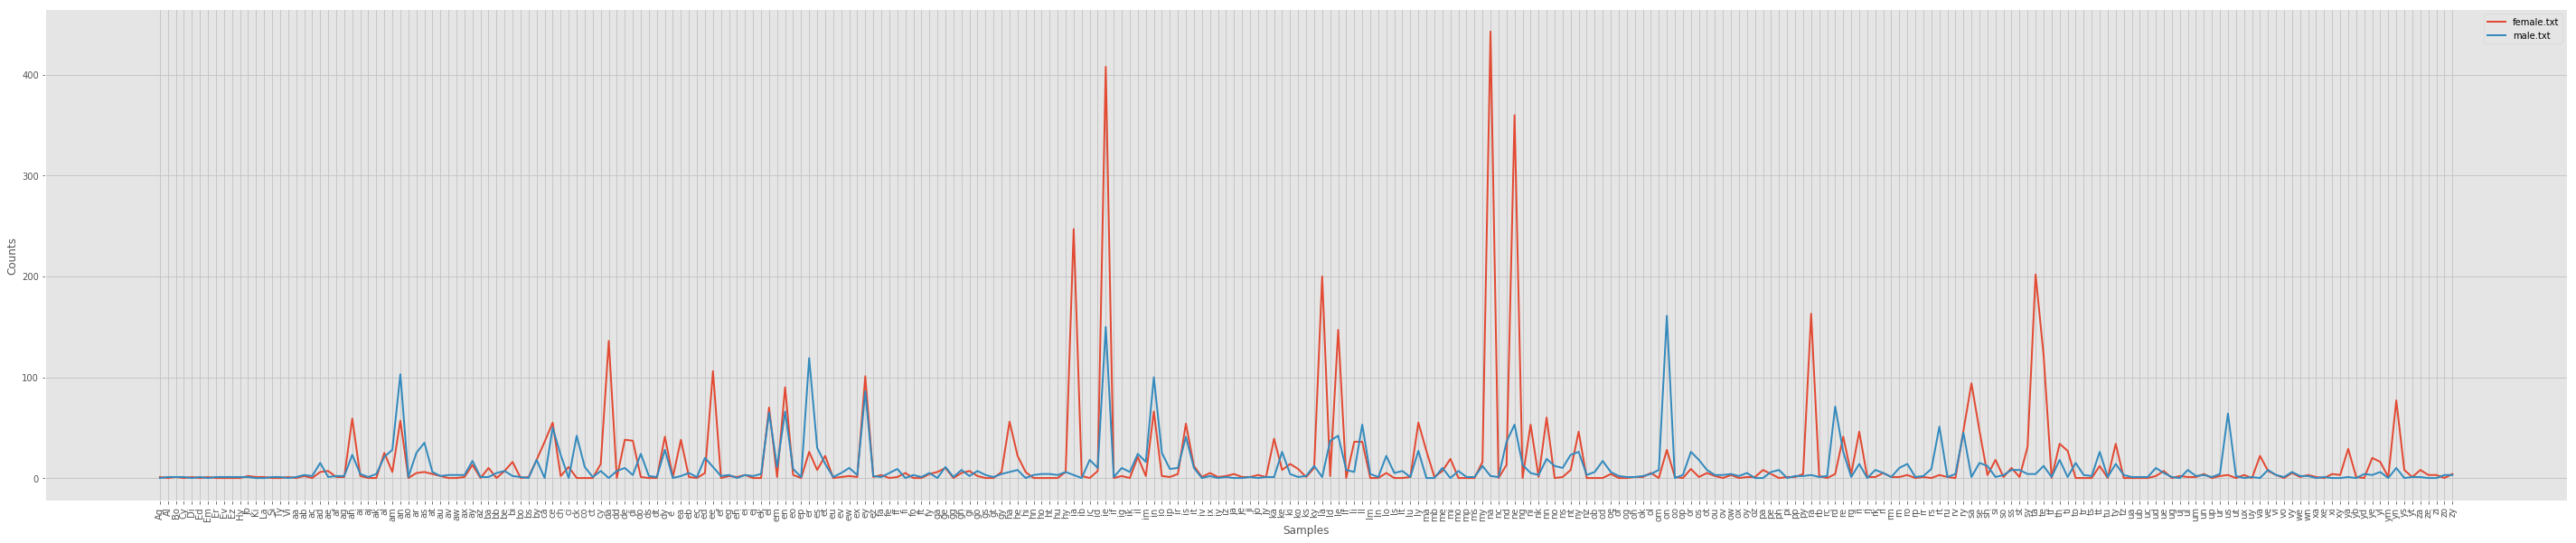

In [6]:
plt.figure(figsize=(50,10))
name_cfd.plot()

In [7]:
def name_features(name):
    return {"pair" : name[-2:]}

In [8]:
name_features("Katy")

{'pair': 'ty'}

In [9]:
name_list= [(name, "male") for name in names.words('male.txt')] + [(name,"female") for name in names.words('female.txt')]

In [10]:
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [11]:
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [12]:
random.shuffle(name_list)

In [13]:
name_list[:10]

[('Georgeanna', 'female'),
 ('Sada', 'female'),
 ('Enriqueta', 'female'),
 ('Keene', 'male'),
 ('Petronia', 'female'),
 ('Darline', 'female'),
 ('Melisande', 'female'),
 ('Blinni', 'female'),
 ('Tomkin', 'male'),
 ('Lisa', 'female')]

In [14]:
features = [(name_features(name),gender) for(name,gender) in name_list]

In [15]:
features[:10]

[({'pair': 'na'}, 'female'),
 ({'pair': 'da'}, 'female'),
 ({'pair': 'ta'}, 'female'),
 ({'pair': 'ne'}, 'male'),
 ({'pair': 'ia'}, 'female'),
 ({'pair': 'ne'}, 'female'),
 ({'pair': 'de'}, 'female'),
 ({'pair': 'ni'}, 'female'),
 ({'pair': 'in'}, 'male'),
 ({'pair': 'sa'}, 'female')]

In [16]:
len(features)/2

3972.0

In [17]:
training_set= features[:3972]
testing_set= features[3972:]

In [18]:
classifier= nltk.NaiveBayesClassifier.train(training_set)

In [19]:
male_names= names.words('male.txt')

In [20]:
"Carmello" in male_names

False

In [21]:
classifier.classify(name_features("Carmello"))

'male'

In [22]:
nltk.classify.accuracy(classifier,testing_set)

0.7804632426988922

In [27]:
"Vikram" in male_names

False

In [28]:
classifier.classify(name_features("Vishal"))

'female'

In [29]:
"Reema" in male_names

False

In [26]:
classifier.classify(name_features("Reema"))

'female'